In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [2]:
airline=pd.read_excel('C:/DS/DS ASSIGNMENTS/Clustering/EastWestAirlines.xlsx','data')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## EDA

In [3]:
airline.drop(['ID#'],axis=1)
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
airline.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
airline.duplicated().sum()

0

In [6]:
airline[airline.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [7]:
airline.drop(3876,axis=0)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:

# Normalize heterogenous numerical data using z-score (x-mean/std) or custom defined function 
# Normalization function - here custom defined
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
# Normalized data frame (considering the numerical part of data)
airline2_norm = norm_func(airline)
airline2_norm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


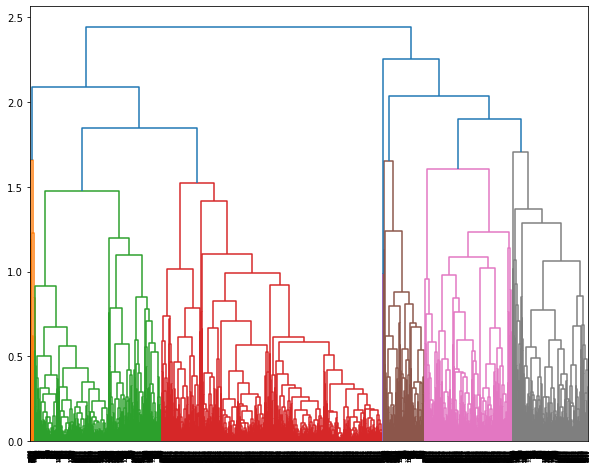

In [10]:
# Create Dendrograms
plt.figure(figsize=(10, 8))  
dendograms=sch.dendrogram(sch.linkage(airline2_norm,'complete'))

In [11]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [12]:
y=pd.DataFrame(hclusters.fit_predict(airline2_norm),columns=['clustersid'])
y['clustersid'].value_counts()

0    912
4    884
2    838
1    796
3    569
Name: clustersid, dtype: int64

In [13]:
#Adding clusters to dataset
airline['clustersid']=hclusters.labels_
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [14]:
airline.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1647.451754,103377.721491,221.676535,3.691886,1.001096,1.023026,41796.067982,19.587719,674.711623,2.025219,4796.646930,1.0
1,1,1879.143216,106682.484925,72.143216,3.227387,1.001256,1.026382,26773.806533,16.486181,196.809045,0.551508,4363.711055,0.0
2,2,3328.994033,31061.826969,108.257757,1.000000,1.000000,1.000000,2479.093079,5.661098,277.115752,0.769690,1784.566826,0.0
3,3,1902.894552,86915.794376,269.880492,1.010545,1.038664,1.010545,8244.121265,9.683656,1150.478032,3.520211,4350.043937,1.0
4,4,1342.245475,44849.627828,81.942308,1.003394,1.038462,1.001131,2674.084842,5.831448,204.661765,0.632353,5261.788462,0.0


# Kmeans

In [15]:
airline1=pd.read_excel('C:/DS/DS ASSIGNMENTS/Clustering/EastWestAirlines.xlsx','data')


In [16]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)
df_norm=norm_func(airline.iloc[:,1:])

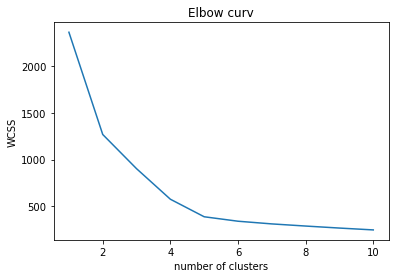

In [17]:
# Elbow curv
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
 #selecting 4 clusters from above scree plot
model=KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_

array([1, 1, 1, ..., 2, 1, 1])

In [19]:
x=pd.Series(model.labels_)
airline1['Clust']=x
airline1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [20]:
airline1.iloc[:,1:5].groupby(airline1.Clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles
Clust,,,,
0,106767.803526,72.324937,3.232997,1.001259
1,38180.106729,94.638631,1.001740,1.019722
2,103377.721491,221.676535,3.691886,1.001096
3,86915.794376,269.880492,1.010545,1.038664


# DBSCAN

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [22]:
airline3=pd.read_excel('C:/DS/DS ASSIGNMENTS/Clustering/EastWestAirlines.xlsx','data')
airline3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [23]:
df=airline3.iloc[:,1:12]
df.values

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

<AxesSubplot:>

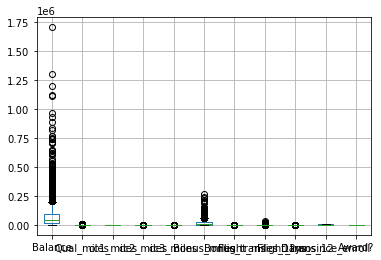

In [24]:
df.boxplot()

C:\Users\DOLTADE\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\DOLTADE\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\DOLTADE\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\DOLTADE\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1235: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\DOLTADE\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1236: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


<AxesSubplot:>

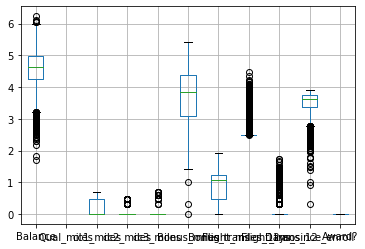

In [25]:
df.apply(np.log10).boxplot()

In [26]:
stscaler=StandardScaler().fit(df.values)
x=stscaler.transform(df.values)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [27]:
dbscan=DBSCAN(eps=0.9,min_samples=7)
dbscan.fit(x)


DBSCAN(eps=0.9, min_samples=7)

In [28]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [29]:
pd.concat([airline3,cl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0
